<a href="https://colab.research.google.com/github/deepthibalasubramanian/IBM-Hackathon-Campus-Placement-Trends/blob/main/IBMHackChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Patterns and Trends in Campus Placement Data using Machine Learning
Campus placement data comprises information about students, their academic performance, skills, internships, and their eventual placement outcomes.

The objective is to extract valuable insights from available data to understand factors influencing probability of placement success, and develop strategies for improving the placement process by identifying patterns and trends in campus placement data using machine learning techniques.



**GOAL:**

To predict whether a student would get placed or not.

**A project by:**
- Abirami Gurushanker
- Deepthi B
- Harshita V
- Akilaa M

#Dataset used
https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

#Data Visualization

The first step towards analyzing a dataset is to understand its attributes.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# creating a dataframe of the given dataset
df=pd.read_csv("Placement_Data_Full_Class.csv")

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [ ]:
# finding the dimension of the dataframe
df.shape

(215, 15)

In [ ]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [ ]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical))

,count,unique,top,freq
gender,215,2,M,139
ssc_b,215,2,Central,116
hsc_b,215,2,Others,131
hsc_s,215,3,Commerce,113
degree_t,215,3,Comm&Mgmt,145
workex,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


In [ ]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
#Data visualisation

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

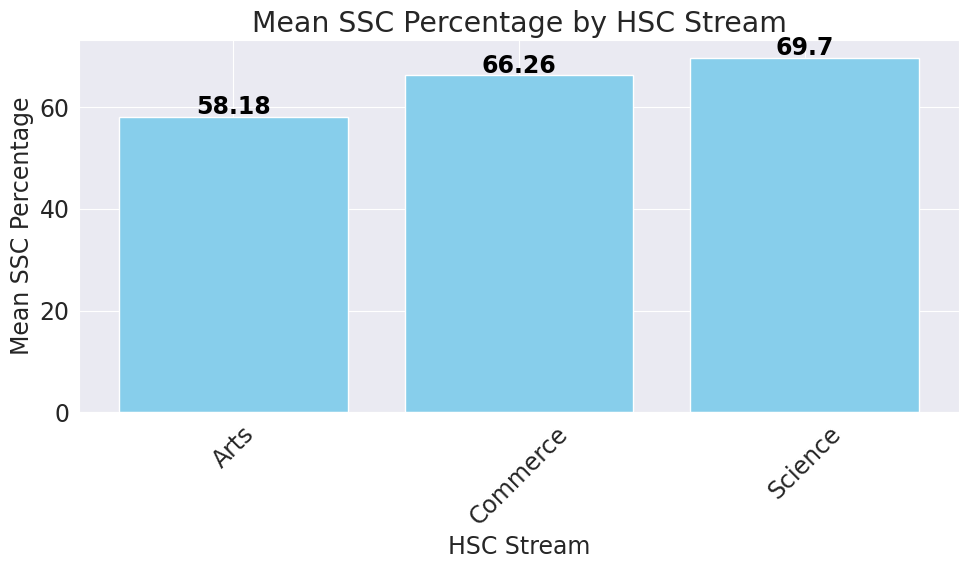

In [ ]:
grouped = df.groupby('hsc_s')['ssc_p'].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
bars=plt.bar(grouped['hsc_s'], grouped['ssc_p'], color='skyblue')
plt.xlabel('HSC Stream')
plt.ylabel('Mean SSC Percentage')
plt.title('Mean SSC Percentage by HSC Stream')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', color='black', fontweight='bold')

plt.show()

Inference:

It is observed that the average SSC marks secured by students in Science stream is higher than those who pursued Commerce or Arts in HSC.

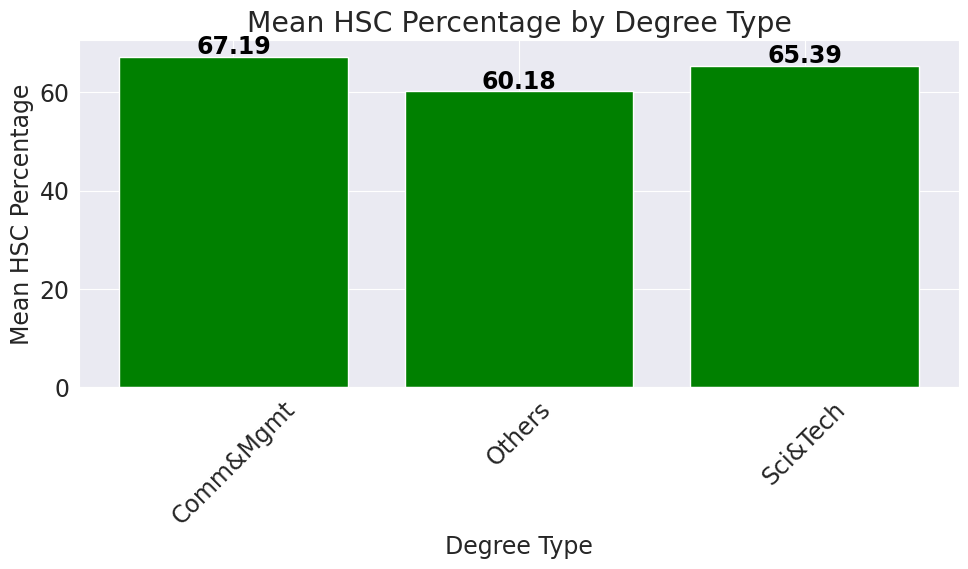

In [ ]:
# Group the data by degree_t and calculate the mean hsc_p for each degree type
grouped = df.groupby('degree_t')['hsc_p'].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
bars=plt.bar(grouped['degree_t'], grouped['hsc_p'], color='green')
plt.xlabel('Degree Type')
plt.ylabel('Mean HSC Percentage')
plt.title('Mean HSC Percentage by Degree Type')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', color='black', fontweight='bold')

plt.show()

Inference:

It is observed that students pursuing degree in Commerce and Management possess higher grades in HSC than those in Science and other courses.

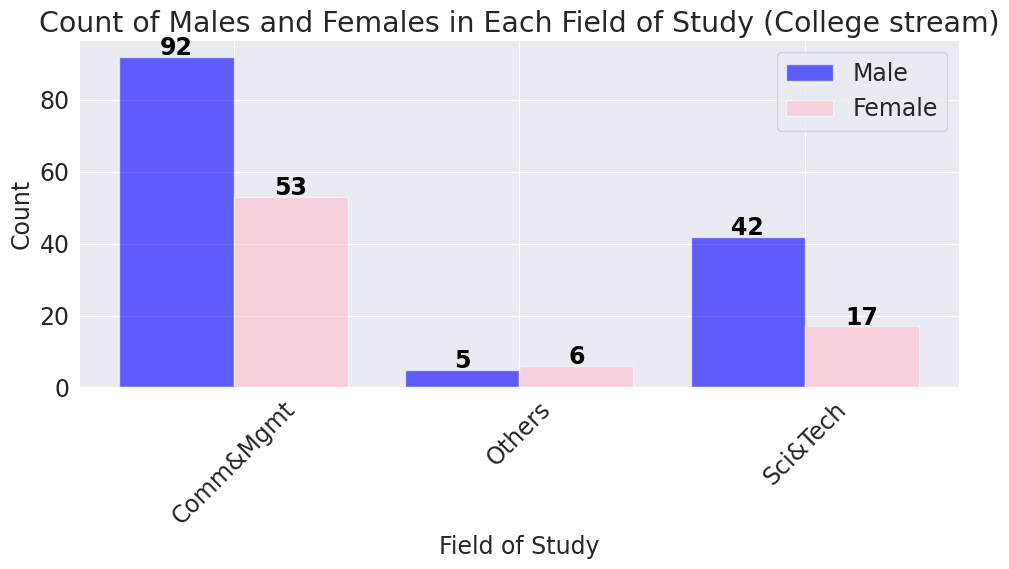

In [ ]:
# Group the data by degree_t and gender and calculate the counts
grouped = df.groupby(['degree_t', 'gender']).size().reset_index(name='count')

# Pivot the data to have counts for males and females as separate columns
pivot_table = grouped.pivot(index='degree_t', columns='gender', values='count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(pivot_table))

bars_male = plt.bar(index, pivot_table['M'], width=bar_width, color='blue', alpha=0.6, label='Male')
bars_female = plt.bar([i + bar_width for i in index], pivot_table['F'], width=bar_width, color='pink', alpha=0.6, label='Female')

# Display the values on top of the bars
for bar in bars_male:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', color='black', fontweight='bold')

for bar in bars_female:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', color='black', fontweight='bold')

plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.title('Count of Males and Females in Each Field of Study (College stream)')
plt.xticks([i + bar_width/2 for i in index], pivot_table.index, rotation=45)
plt.legend()
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('grouped_bar_chart.png')

# Show the grouped bar chart
plt.show()

Inference:

The Male to Female ratio between students pursuing studies in Science and Technology is higher compared to other fields of study.

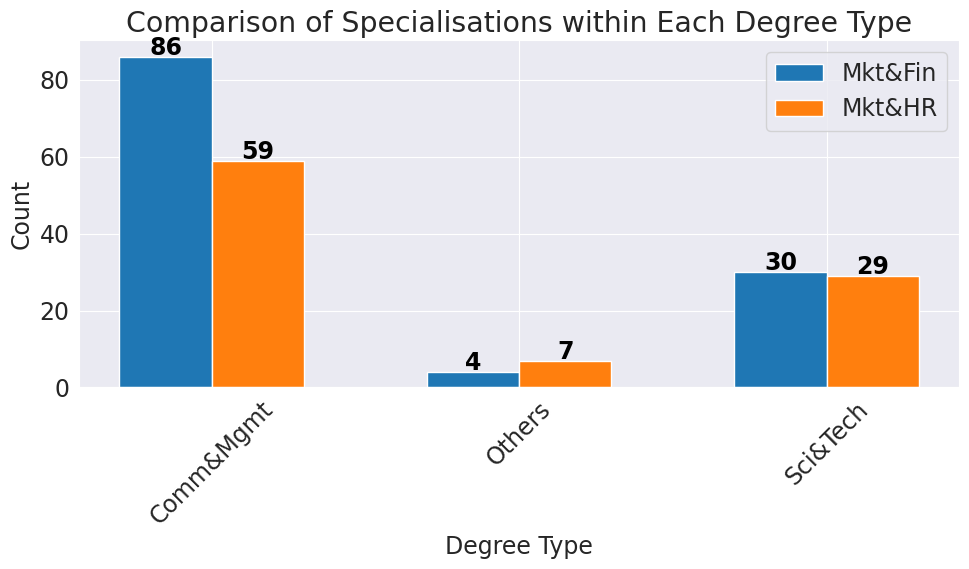

In [ ]:
# Group the data by degree_t and specialisation and calculate the counts
grouped = df.groupby(['degree_t', 'specialisation']).size().reset_index(name='count')

# Pivot the data to have counts for different specialisations within each degree type
pivot_table = grouped.pivot(index='degree_t', columns='specialisation', values='count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = range(len(pivot_table))

for i, specialization in enumerate(pivot_table.columns):
    bars = plt.bar([pos + i * bar_width for pos in index], pivot_table[specialization], width=bar_width, label=specialization)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', color='black', fontweight='bold')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.title('Comparison of Specialisations within Each Degree Type')
plt.xticks([i + (len(pivot_table.columns) - 1) * bar_width / 2 for i in index], pivot_table.index, rotation=45)
plt.legend()
plt.tight_layout()

# Save the plot as an image file (optional)
plt.savefig('grouped_specialisation_bar_chart.png')

# Show the grouped bar chart
plt.show()


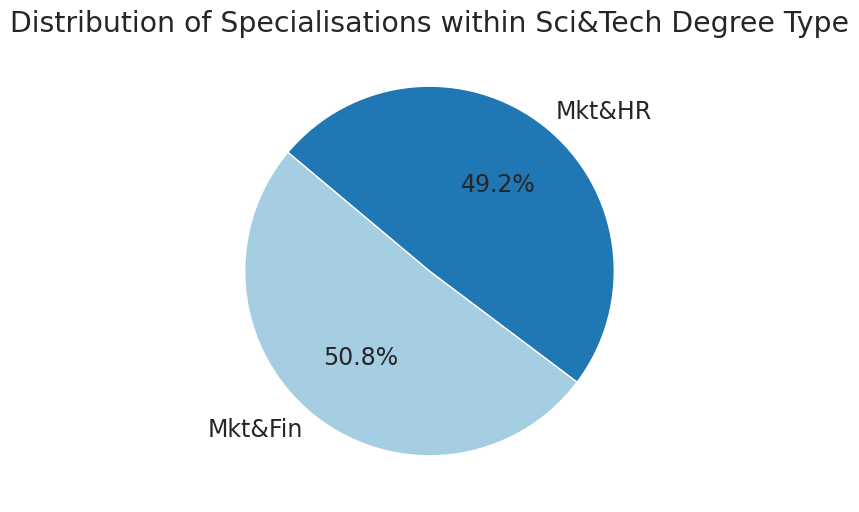

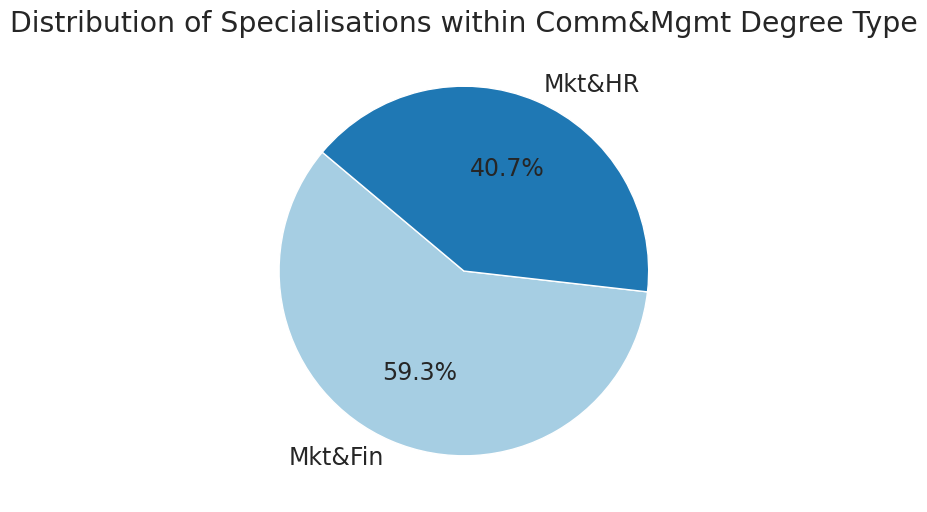

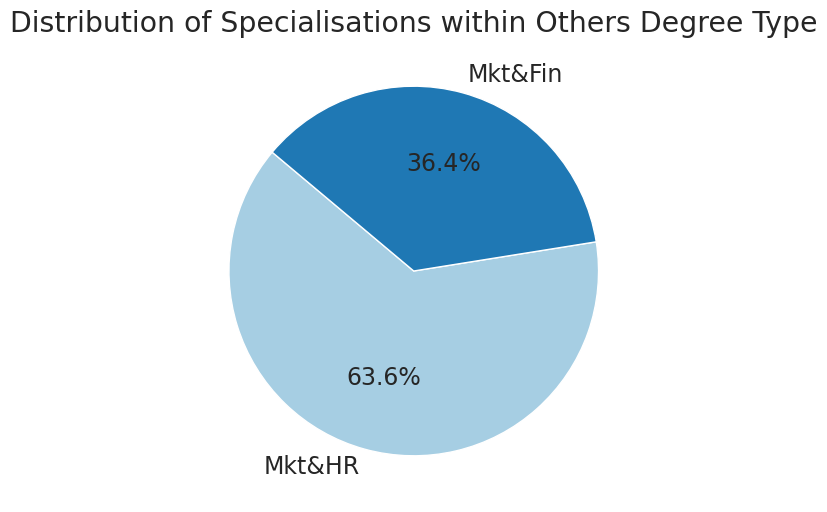

In [ ]:
# Get unique degree types
degree_types = df['degree_t'].unique()

# Loop through each degree type
for chosen_degree_type in degree_types:
    # Filter the data for the chosen degree type
    filtered_data = df[df['degree_t'] == chosen_degree_type]

    # Group the filtered data by specialisation and calculate the counts
    grouped = filtered_data['specialisation'].value_counts().reset_index(name='count')

    # Create a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(grouped['count'], labels=grouped['index'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of Specialisations within {chosen_degree_type} Degree Type')

    # Save the plot as an image file (optional)
    plt.savefig(f'pie_chart_{chosen_degree_type}.png')

    # Show the pie chart
    plt.show()


Inference:

It can be observed that marketing and finance is dominant in commerce and management field, whereas, all other degree types have students specializing in marketing and HR.

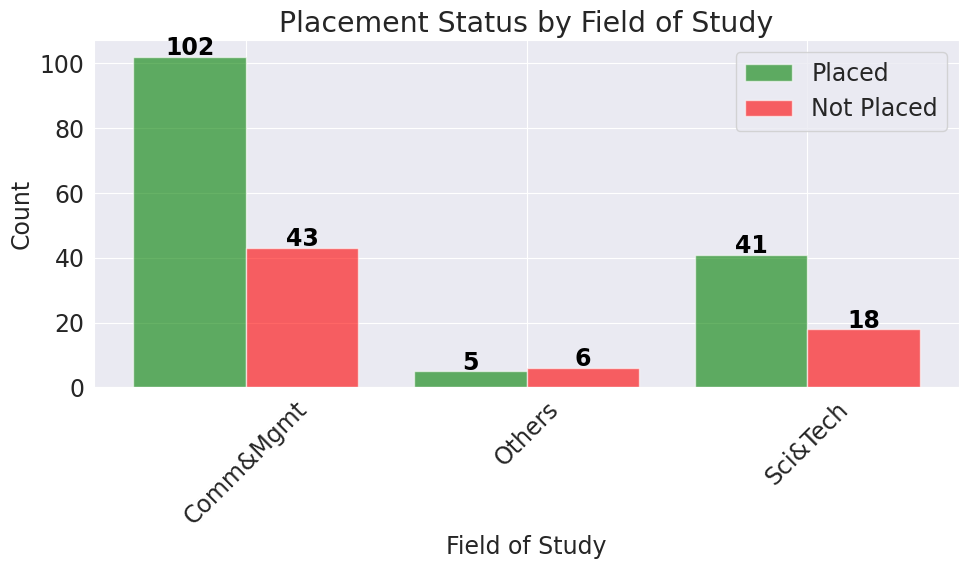

In [ ]:
# Group the data by degree_t and status and calculate the counts
grouped = df.groupby(['degree_t', 'status']).size().reset_index(name='count')

# Pivot the data to have counts for placed and not placed students within each field of study
pivot_table = grouped.pivot(index='degree_t', columns='status', values='count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(pivot_table))

bars_placed = plt.bar(index, pivot_table['Placed'], width=bar_width, color='green', alpha=0.6, label='Placed')
bars_not_placed = plt.bar([i + bar_width for i in index], pivot_table.get('Not Placed', 0), width=bar_width, color='red', alpha=0.6, label='Not Placed')

plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.title('Placement Status by Field of Study')
plt.xticks([i + bar_width/2 for i in index], pivot_table.index, rotation=45)
plt.legend()
plt.tight_layout()
for bar in bars_placed + bars_not_placed:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', color='black', fontweight='bold')

# Show the grouped bar chart
plt.show()

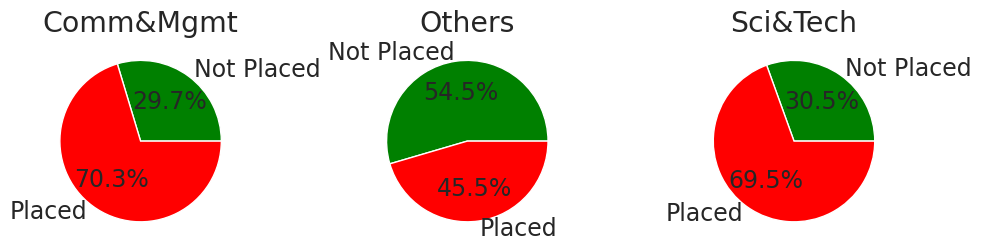

In [ ]:
# Group the data by degree_t and status and calculate the counts
grouped = df.groupby(['degree_t', 'status']).size().reset_index(name='count')

# Pivot the data to have counts for placed and not placed students within each field of study
pivot_table = grouped.pivot(index='degree_t', columns='status', values='count')

# Create pie charts for each field of study
plt.figure(figsize=(10, 6))

for field in pivot_table.index:
    plt.subplot(1, len(pivot_table), pivot_table.index.get_loc(field) + 1)
    plt.pie(pivot_table.loc[field], labels=pivot_table.columns, autopct='%1.1f%%', colors=['green', 'red'])
    plt.title(field)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

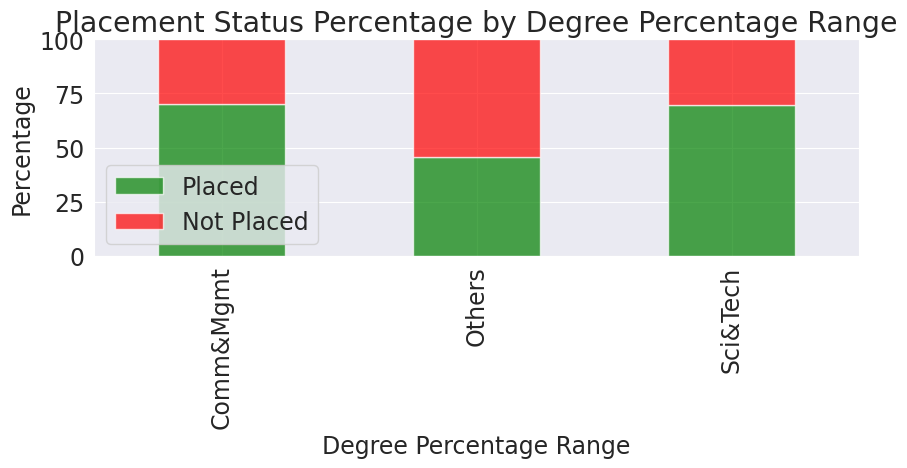

In [ ]:
# Calculate the total count for each degree_p range
pivot_table['Total'] = pivot_table['Placed'] + pivot_table['Not Placed']

# Calculate the percentage of placed students
pivot_table['Placed Percentage'] = (pivot_table['Placed'] / pivot_table['Total']) * 100
pivot_table['Not Placed Percentage'] = (pivot_table['Not Placed'] / pivot_table['Total']) * 100

# Create a percentage stacked bar chart
plt.figure(figsize=(10, 6))
pivot_table[['Placed Percentage', 'Not Placed Percentage']].plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.xlabel('Degree Percentage Range')
plt.ylabel('Percentage')
plt.title('Placement Status Percentage by Degree Percentage Range')
plt.legend(['Placed', 'Not Placed'])
plt.grid(True)
plt.tight_layout()

# Set y-axis limits to provide a better scale
plt.ylim(0, 100)

# Show the percentage stacked bar chart
plt.show()

Inference:

It is observed that students studying in commerce and management field have higher chances of getting placed, whereas students belonging to the 'other' category have almost equal chances of getting placed or not.

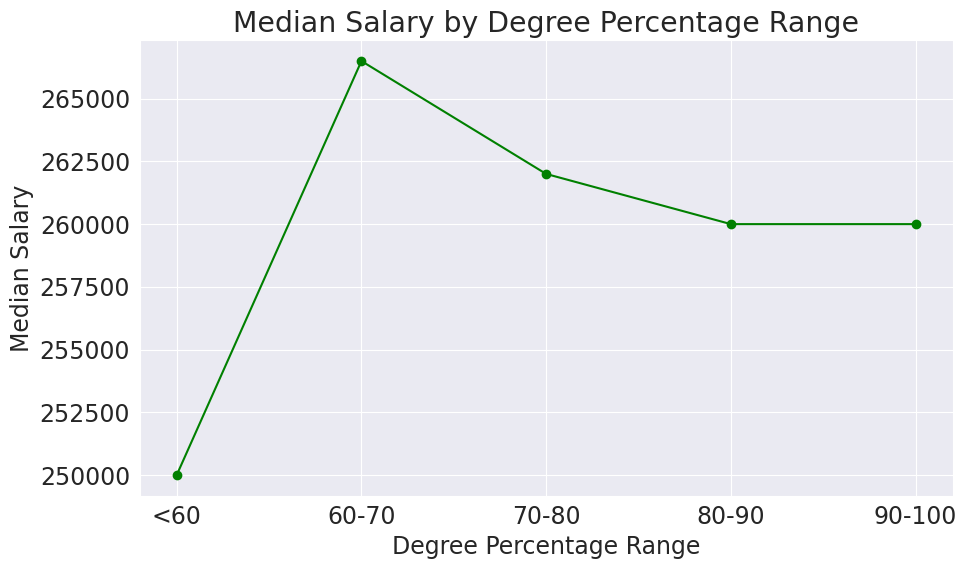

In [ ]:
# Group the data by degree_p range and calculate the median salary
bins = [0, 60, 70, 80, 90, 100]
labels = ['<60', '60-70', '70-80', '80-90', '90-100']
df['degree_p_range'] = pd.cut(df['degree_p'], bins=bins, labels=labels, right=False)
grouped = df.groupby('degree_p_range')['salary'].median().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped['degree_p_range'], grouped['salary'], marker='o', color='green')
plt.xlabel('Degree Percentage Range')
plt.ylabel('Median Salary')
plt.title('Median Salary by Degree Percentage Range')
plt.grid(True)
plt.tight_layout()

# Show the line plot
plt.show()

Inference:

It can be observed that median salary cannot be the determining factor to decide the salary package of students.

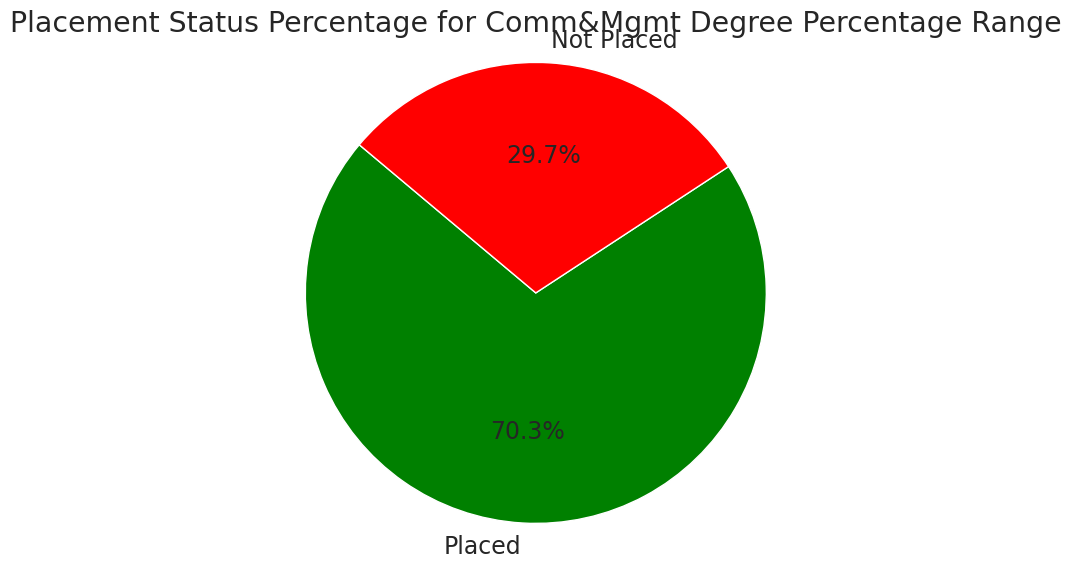

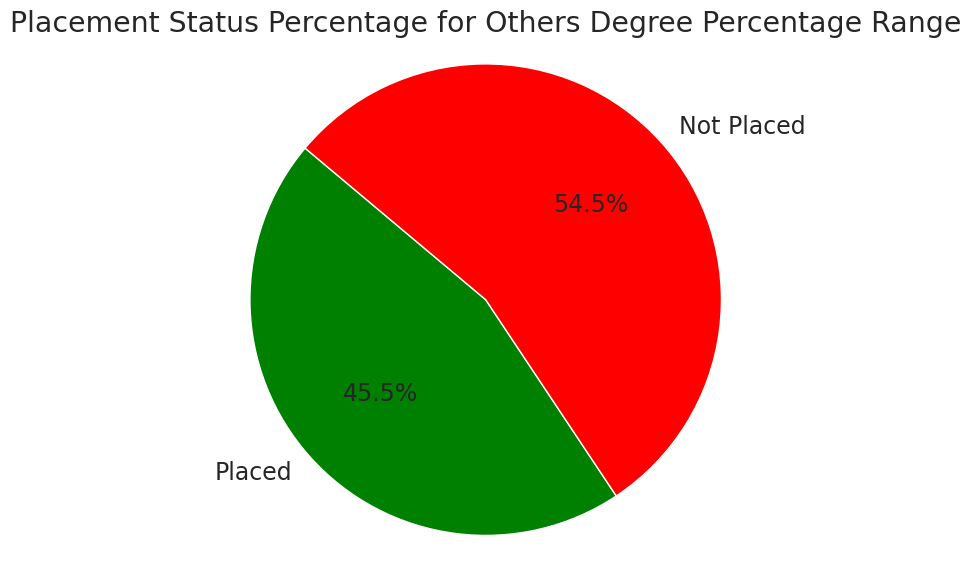

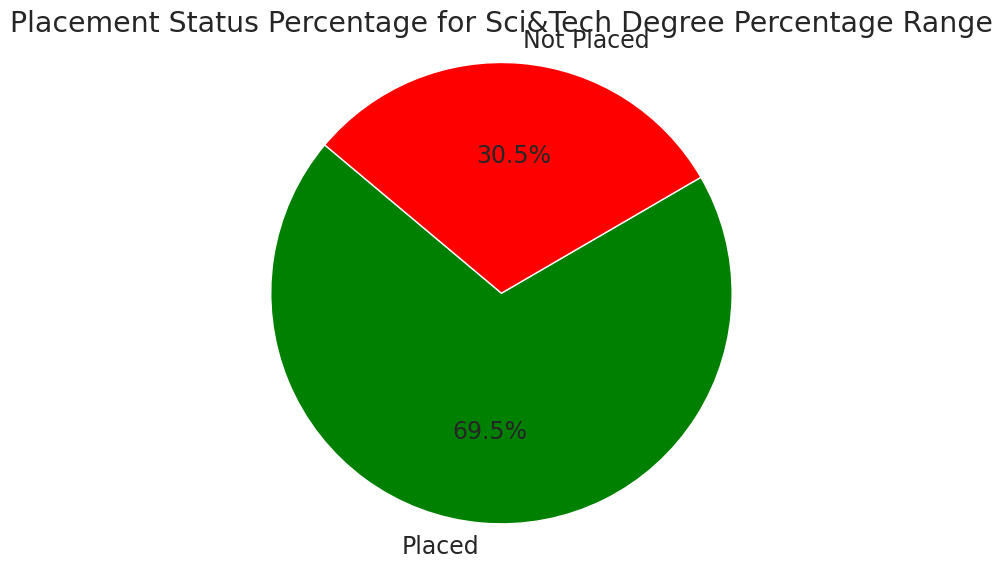

In [ ]:
# Create a pie chart for each degree percentage range
for index, row in pivot_table.iterrows():
    labels = ['Placed', 'Not Placed']
    sizes = [row['Placed Percentage'], row['Not Placed Percentage']]
    colors = ['green', 'red']
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Placement Status for {index} Degree Percentage Range')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.show()

Inference:

We can see that most students pursuing commerce and management have higher chances to get placement offers.

<ipython-input-24-6ee709490390>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['salary_range'] = pd.cut(filtered_data['salary'], bins=bins, labels=labels, right=False)
<ipython-input-24-6ee709490390>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['salary_range'] = pd.cut(filtered_data['salary'], bins=bins, labels=labels, right=False)
<ipython-input-24-6ee709490390>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

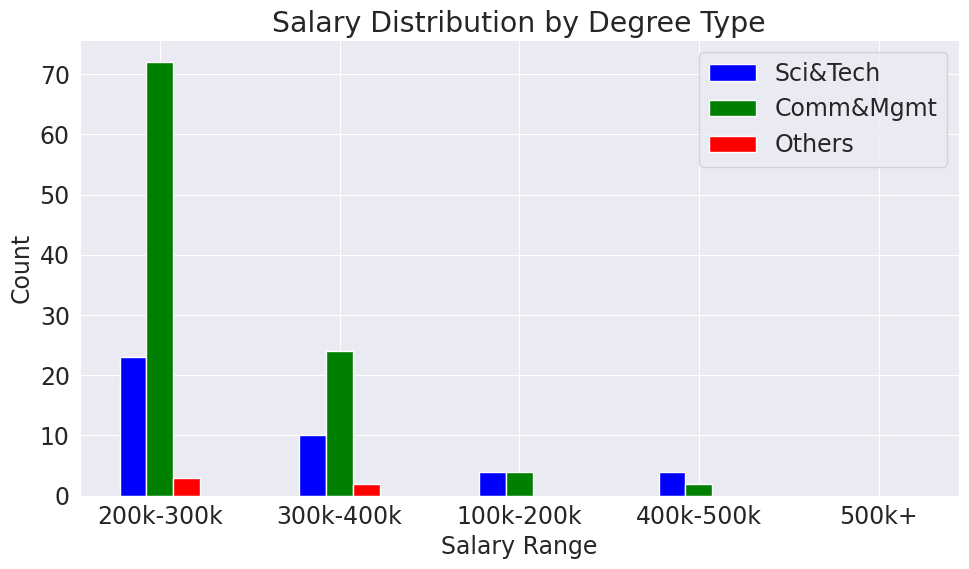

In [ ]:
# Filter out rows where students are not placed
df_placed = df[df['status'] == 'Placed']

# Get unique degree types
unique_degree_types = df_placed['degree_t'].unique()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

for i, degree_type in enumerate(unique_degree_types):
    # Filter the data for the current degree type
    filtered_data = df_placed[df_placed['degree_t'] == degree_type]

    # Categorize salary values into ranges
    bins = [100000, 200000, 300000, 400000, 500000, 1000000]
    labels = ['100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']
    filtered_data['salary_range'] = pd.cut(filtered_data['salary'], bins=bins, labels=labels, right=False)

    # Calculate the count of salary ranges
    salary_range_counts = filtered_data['salary_range'].value_counts()

    plt.bar([x + i*0.15 for x in range(len(salary_range_counts))], salary_range_counts, width=0.15, label=degree_type, color=colors[i])

plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Salary Distribution by Degree Type')
plt.xticks([x + 0.15 for x in range(len(salary_range_counts))], salary_range_counts.index)
plt.legend()
plt.tight_layout()
plt.show()

Inference:

Commerce and Management majors have higher salary package.

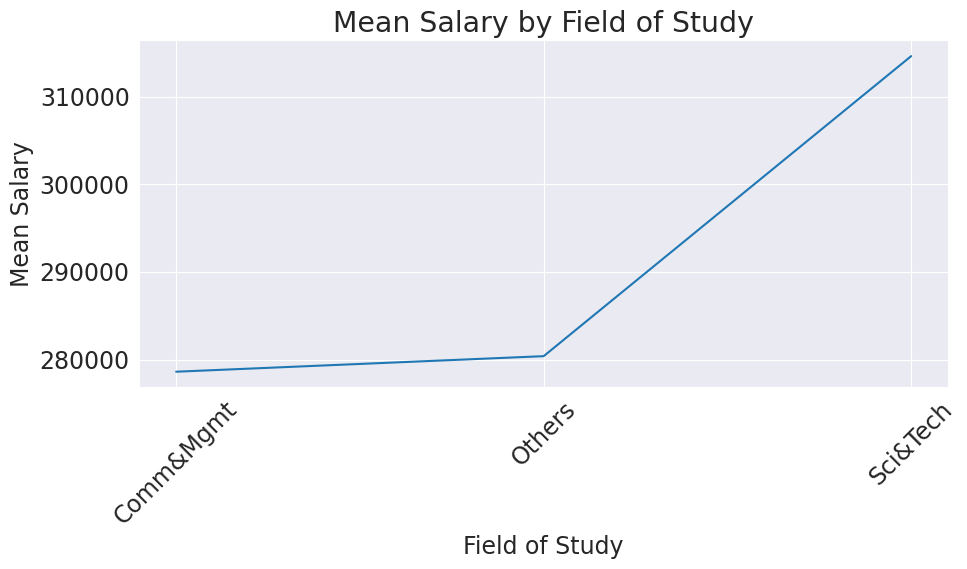

In [ ]:
# Calculate the mean salary for each field of study
mean_salary_by_field = df.groupby('degree_t')['salary'].mean().reset_index()

# Line graph for mean salary by field of study
plt.figure(figsize=(10, 6))
sns.lineplot(x='degree_t', y='salary', data=mean_salary_by_field)
plt.title('Mean Salary by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Inference:

It is observed that the average salary earned by Science and Technology majors are higher than the other department students.

<Figure size 1000x600 with 0 Axes>

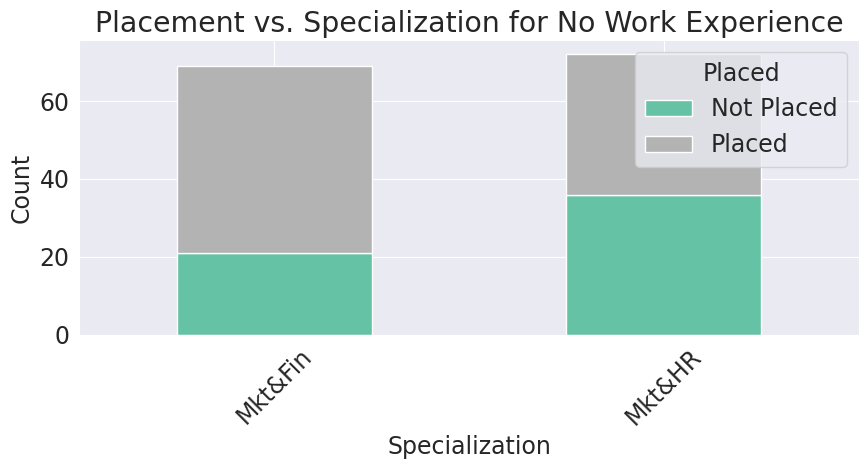

<Figure size 1000x600 with 0 Axes>

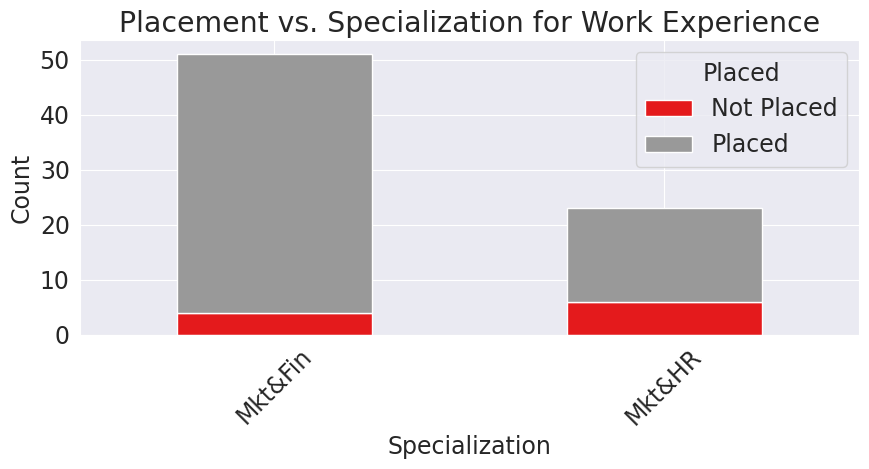

In [ ]:
# Filter data for people without work experience
no_work_experience_data = df[df['workex'] == 'No']

# Create a cross-tabulation for placement vs. specializations for people without work experience
cross_tab_no_work = pd.crosstab(no_work_experience_data['specialisation'], no_work_experience_data['status'])

# Plot a stacked bar plot for placement vs. specializations for people without work experience
plt.figure(figsize=(10, 6))
cross_tab_no_work.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Placement vs. Specialization for No Work Experience')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Placed')
plt.tight_layout()

plt.show()
# Filter data for people with work experience
work_experience_data = df[df['workex'] == 'Yes']

# Create a cross-tabulation for placement vs. specializations for people with work experience
cross_tab_work_experience = pd.crosstab(work_experience_data['specialisation'], work_experience_data['status'])

# Plot a stacked bar plot for placement vs. specializations for people with work experience
plt.figure(figsize=(10, 6))
cross_tab_work_experience.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Placement vs. Specialization for Work Experience')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Placed')
plt.tight_layout()

plt.show()

Inference:

It can be seen that students with prior experience have better chances of getting placed. Moreover, many students in the marketing and finance field tend to get placed irrespective of level of experience.

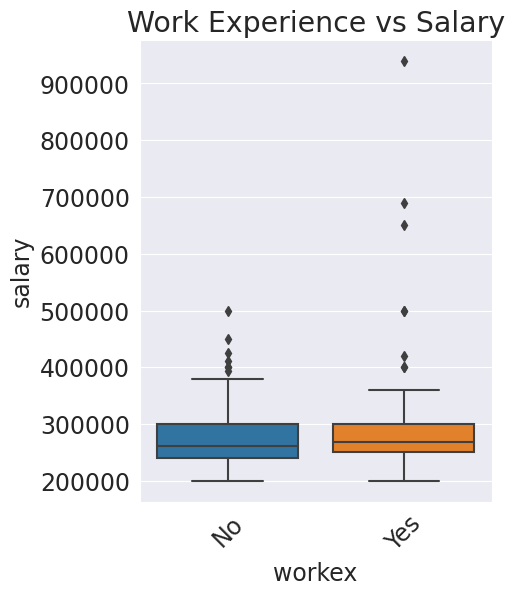

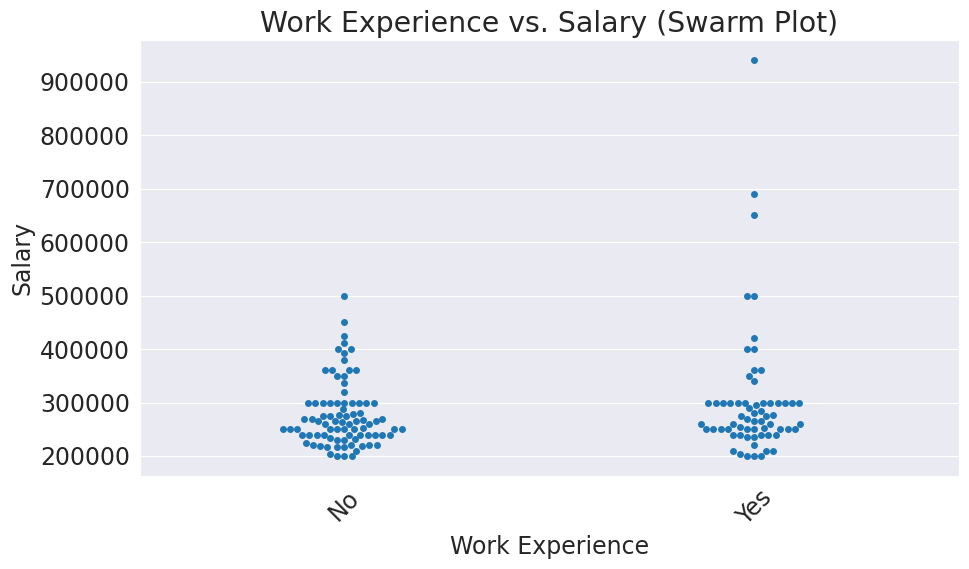

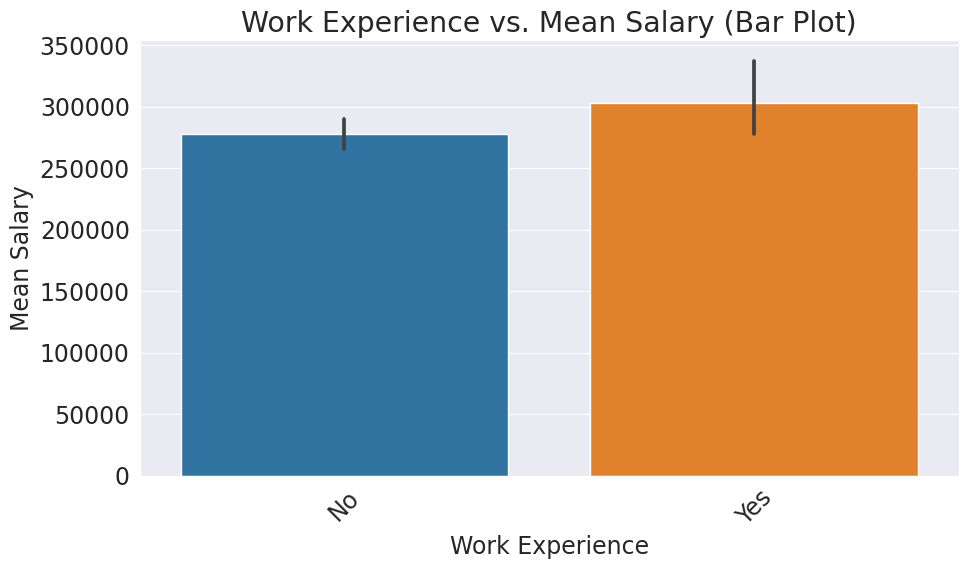

In [ ]:
plt.figure(figsize=(10, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='workex', y='salary', data=df_placed)
plt.title('Work Experience vs Salary')
plt.xticks(rotation=45)

# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='workex', y='salary', data=df_placed)
plt.title('Work Experience vs. Salary (Swarm Plot)')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='workex', y='salary', data=df_placed, estimator=lambda x: sum(x) / len(x))
plt.title('Work Experience vs. Mean Salary (Bar Plot)')
plt.xlabel('Work Experience')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inference:

It is observed that candidates with more experience tend to earned higher salary packages.

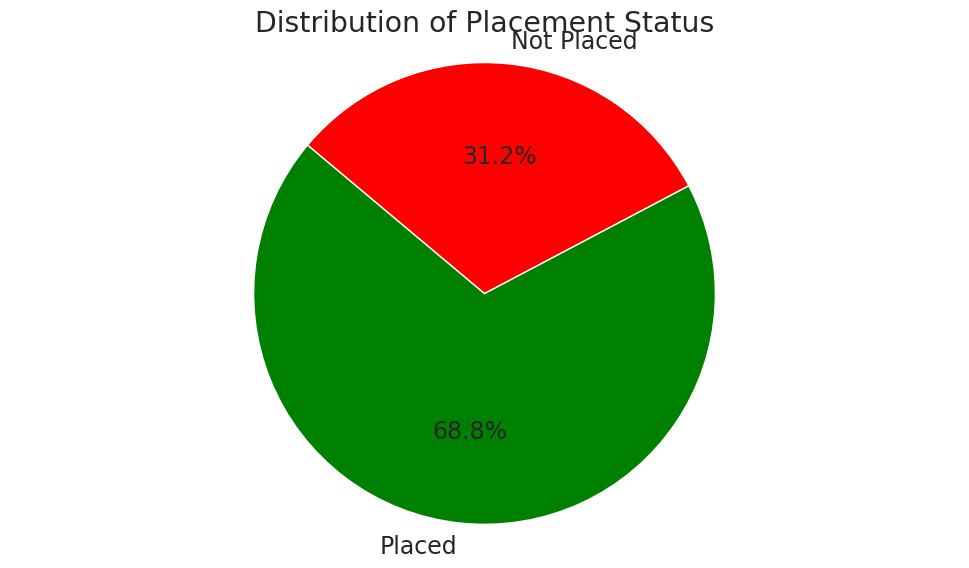

In [ ]:
# Calculate the number of placed and not placed students
num_placed = df[df['status'] == 'Placed'].shape[0]
num_not_placed = df[df['status'] == 'Not Placed'].shape[0]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie([num_placed, num_not_placed], labels=['Placed', 'Not Placed'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Distribution of Placement Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

Inference:

Over two-third of candidates are placed.

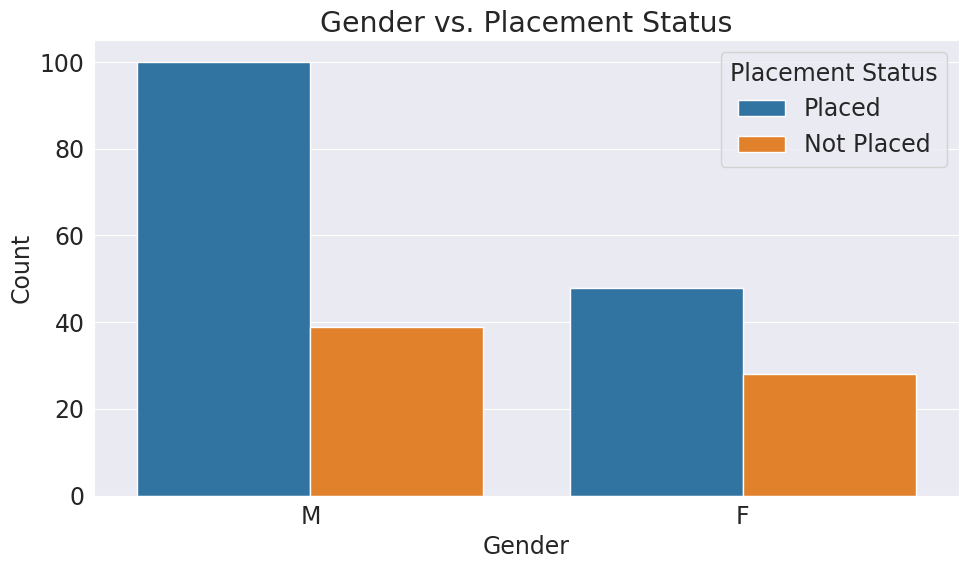

In [ ]:
# Create a countplot to compare gender and placement status
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='status', data=df)
plt.title('Gender vs. Placement Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Placement Status')
plt.tight_layout()

Inference:

It is observed that male candidates are higher in number. Proportion of male candidates getting placed is three-fifth of the entire male candidate applications whereas, about half the female candidates are placed.

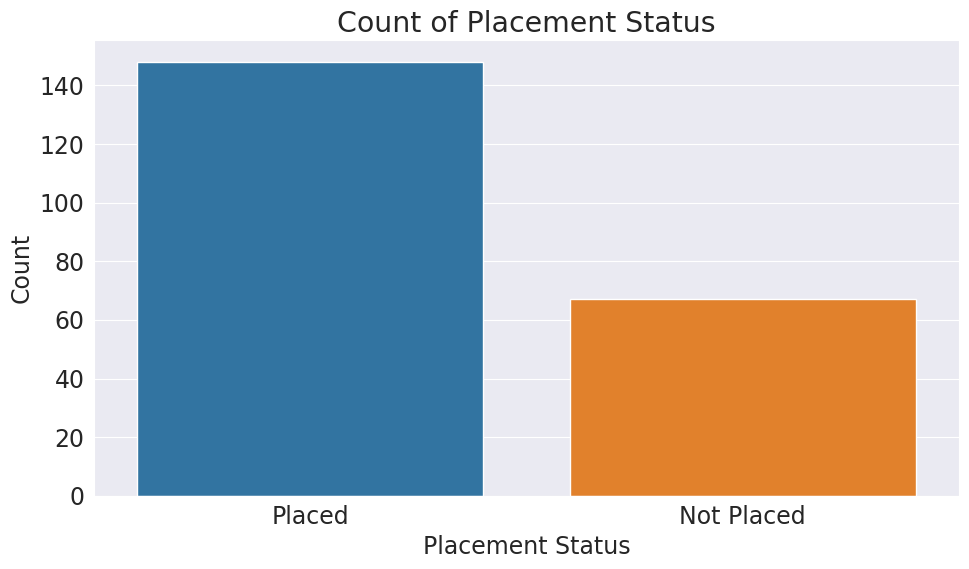

In [ ]:
# Create a countplot for placement status
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Count of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Inference:

Out of all the students participating in campus placement during a given year, half of them are placed.

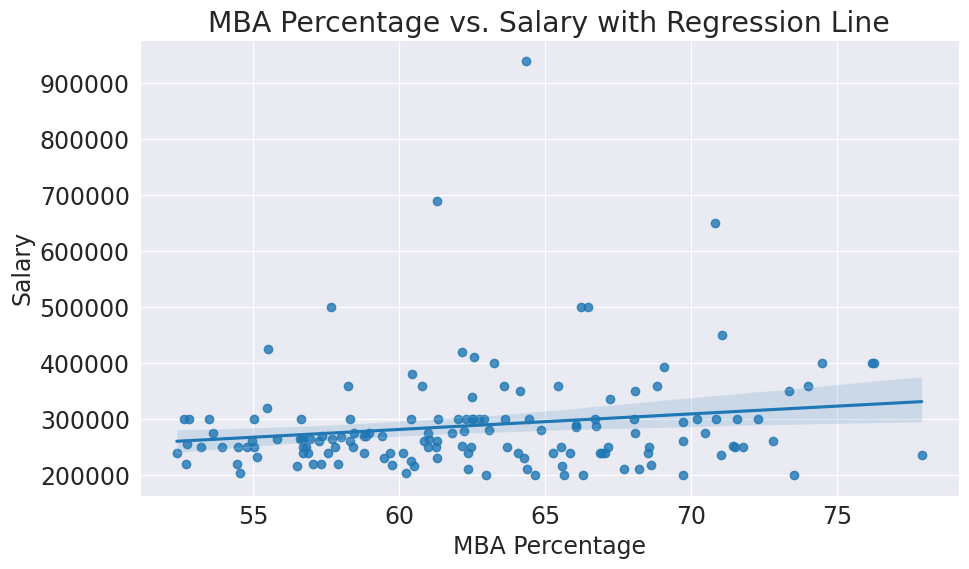

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mba_p', y='salary', data=df_placed)
plt.title('MBA Percentage vs. Salary with Regression Line')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

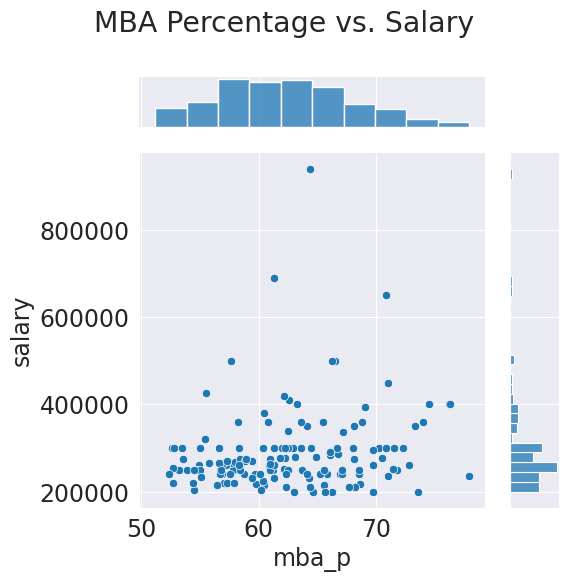

In [ ]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='mba_p', y='salary', data=df, kind='scatter')
plt.suptitle('MBA Percentage vs. Salary')
plt.tight_layout()

plt.show()

Inference:

Salary acquired by the candidate is strongly correlated with their MBA percentage.

# Data Preprocessing

## Data inspection

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.shape

(215, 15)

In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
#since the count of salary is less that the rest of the attributes, we will check for null values
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#67 null values in salary
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

## Data cleaning

In [ ]:
data.drop(columns='sl_no', axis=1, inplace=True)

In [ ]:
#the NaN values in salary are for the students who did not get placed
data['salary'].fillna(value=0, inplace=True)

In [ ]:
# dropping the school boards as recruiters usually do not look into those details
data.drop(columns=['ssc_b','hsc_b'], axis=1, inplace=True)

Text(0.5, 1.0, 'Online Assessment Score')

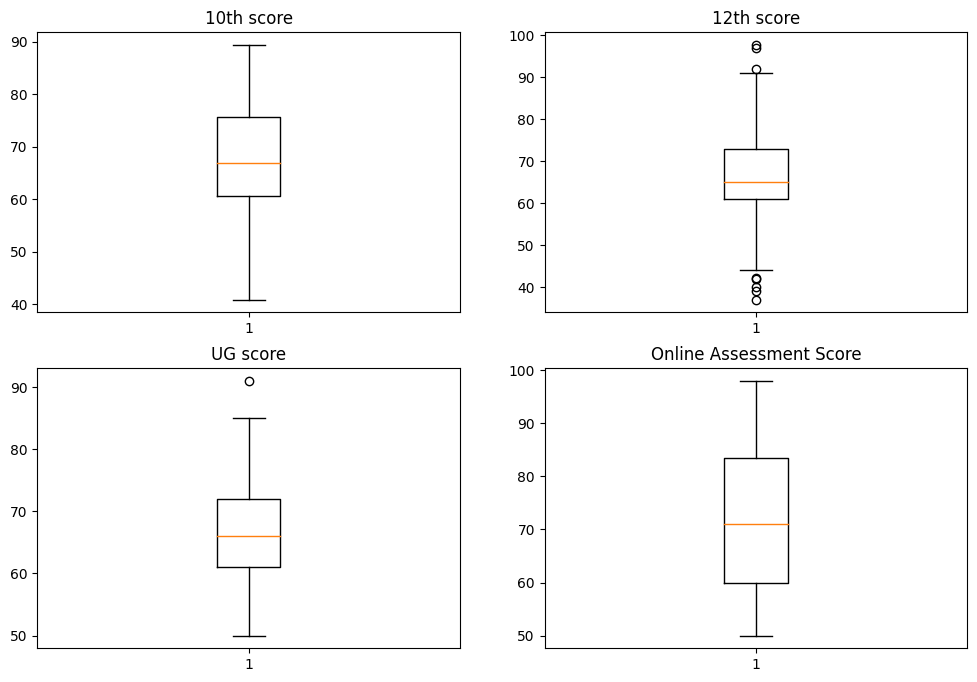

In [ ]:
#removing outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
ax=plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('10th score')
ax=plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('12th score')
ax=plt.subplot(223)
plt.boxplot(data['degree_p'])
ax.set_title('UG score')
ax=plt.subplot(224)
plt.boxplot(data['etest_p'])
ax.set_title('Online Assessment Score')

In [ ]:
#lot of outliers in 12th score (hsc_p)
q1 = data['hsc_p'].quantile(0.25)
q3 = data['hsc_p'].quantile(0.75)
range = q3-q1
lower_bound = q1 - 1.5*range
upper_bound = q3 + 1.5*range

filter = (data['hsc_p'] >= lower_bound) & (data['hsc_p'] <= upper_bound)
data = data.loc[filter]

##Data encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          207 non-null    object 
 1   ssc_p           207 non-null    float64
 2   hsc_p           207 non-null    float64
 3   hsc_s           207 non-null    object 
 4   degree_p        207 non-null    float64
 5   degree_t        207 non-null    object 
 6   workex          207 non-null    object 
 7   etest_p         207 non-null    float64
 8   specialisation  207 non-null    object 
 9   mba_p           207 non-null    float64
 10  status          207 non-null    object 
 11  salary          207 non-null    float64
dtypes: float64(6), object(6)
memory usage: 21.0+ KB


In [ ]:
#columns to be encoded are gender, hsc_s, degree_t, workex, specialisation, status
#since gender, workex, specialisation and status have only two possible values they are encoded as 0/1
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['gender','workex','specialisation','status']:
  data[col] = encoder.fit_transform(data[col])

data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [ ]:
from seaborn._stats.counting import dataclass
#hsc_s, degree_t have multiple values hence we do one hot encoding

hsc_s_categories = pd.get_dummies(data['hsc_s'])
degree_t_catgories = pd.get_dummies(data['degree_t'])
data = pd.concat([data,hsc_s_categories,degree_t_catgories],axis=1)

data.drop(['hsc_s','degree_t'],axis=1, inplace=True)

data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0



# Data Modelling

## Placement status model

In [ ]:
placement_data = data.drop(columns = 'salary', axis = 1)
x = placement_data.drop(columns = 'status', axis = 1)
y = placement_data['status']

In [ ]:
print(x.shape)
print(y.shape)

(207, 14)
(207,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(165, 14)
(165,)
(42, 14)
(42,)


###Model - 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = model1.predict(x_test)
accuracy = model1.score(x_test,y_test)
print('Accuracy of logistic regression classifier on test set:', accuracy)

Accuracy of logistic regression classifier on test set: 0.8333333333333334


### Model - 2: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model2 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
model2.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [ ]:
y_predict = model2.predict(x_test)
accuracy = model2.score(x_test,y_test)
print('Accuracy of KNN on test set:', accuracy)

Accuracy of KNN on test set: 0.7619047619047619


###Model - 3: Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
model3 = BernoulliNB()
model3.fit(x_train, y_train)

BernoulliNB()

In [ ]:
y_predict = model3.predict(x_test)
cv_scores = cross_val_score(model3, x, y,
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.720728


###Model - 4: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion="gini", max_depth=3)
model4 = model4.fit(x_train,y_train)

In [ ]:
y_predict = model4.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7380952380952381


###Model - 5: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=100)
model5.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=model5.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7857142857142857


Text(0.5, 1.0, 'Visualizing Important Features')

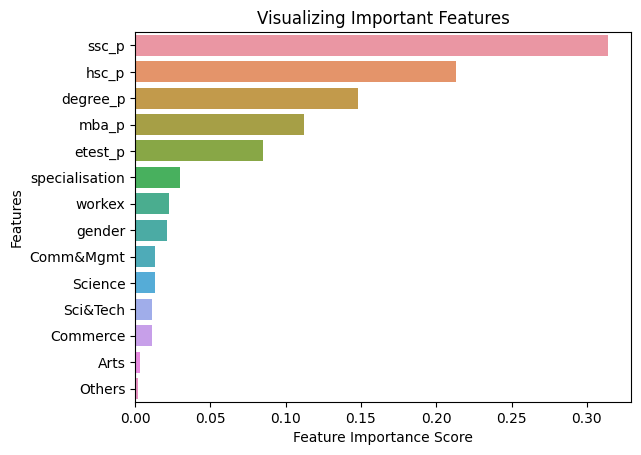

In [ ]:
feature_cols=['gender','ssc_p','hsc_p','degree_p','workex','etest_p','specialisation','mba_p',
              'Arts','Commerce','Science','Comm&Mgmt','Others','Sci&Tech']
feature_imp = pd.Series(model5.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# Model Evaluation

## Placement status model

###Model - 1: Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[ 9  6]
 [ 1 26]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.81      0.96      0.88        27

    accuracy                           0.83        42
   macro avg       0.86      0.78      0.80        42
weighted avg       0.84      0.83      0.82        42



We are able to achieve 83% accuracy

### Model - 2: KNN

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[ 5 10]
 [ 0 27]]


In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        15
           1       0.73      1.00      0.84        27

    accuracy                           0.76        42
   macro avg       0.86      0.67      0.67        42
weighted avg       0.83      0.76      0.72        42



###Model - 3: Naive Bayes

We are able to achieve 72% accuracy.

###Model - 4: Decision Tree Classifier

We are able to achieve 73.8% accuracy

### Model - 5: Random Forest Classifier

We are able to achieve 78.6% accuracy

#Conclusion

Therefore, the given campus placement dataset has been studied, and the relationship between various attributes have been analyzed using mathematical models. It can be concluded from the obtained results that we are able to achieve highest accuracy using Logistic Regression to determine whether the student is placed or not.